# Basit Doğrusal Regresyon Modeli ( Linear Regression )

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
                                                                    # Necessary libraries are imported
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [14]:
df = pd.read_csv("advertising.csv")
df.shape                                  

(200, 4)

In [17]:
X = df[["TV"]]
y = df[["sales"]]

In [36]:
##########################
# Model
##########################
reg_model = LinearRegression().fit(X, y)

In [37]:
# sabit (b - bias)
reg_model.intercept_[0]z

7.032593549127693

In [38]:
# tv'nin katsayısı (w1)
reg_model.coef_[0][0]

0.047536640433019764

In [39]:
# 150 birimlik TV harcaması olsa ne kadar satış olması beklenir?

reg_model.intercept_[0] + reg_model.coef_[0][0] * 150

14.163089614080658

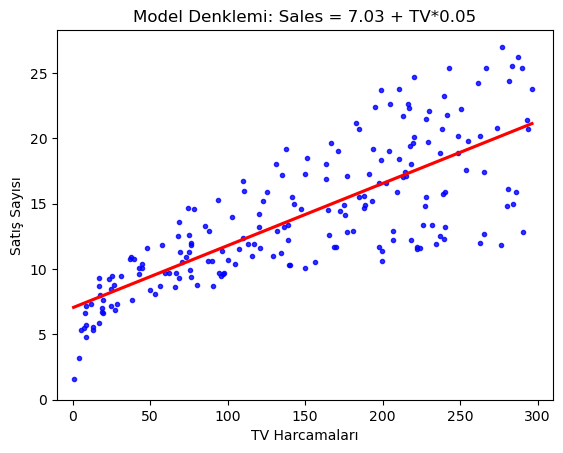

In [40]:
# Modelin Görselleştirilmesi
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [41]:
##########################
# Tahmin Başarısı
##########################

# MSE
y_pred = reg_model.predict(X)
mean_squared_error(y, y_pred)

10.512652915656757

In [42]:
y.mean()

sales   14.02
dtype: float64

In [43]:
y.std()

sales   5.22
dtype: float64

In [44]:
# RMSE
np.sqrt(mean_squared_error(y, y_pred))
# 3.24

3.2423221486546887

In [45]:
# MAE
mean_absolute_error(y, y_pred)
# 2.54

2.549806038927486

In [46]:
# R-KARE
reg_model.score(X, y)
# bağımsız değişken bağımlının ½61ini açıklayabilmektedir

0.611875050850071

# Multiple Linear Regression

In [62]:
df = pd.read_csv("advertising.csv")

X = df.drop('sales', axis=1)

y = df[["sales"]]

In [63]:
# Yüzd kaçı test seti yüzde kaçı train seti olacak 80e 20 gibi ayırma işlemi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [49]:
reg_model = LinearRegression().fit(X_train, y_train)

In [50]:
# sabit (b - bias)
reg_model.intercept_

array([2.90794702])

In [51]:
# coefficients (w - weights)
reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

In [52]:
##########################
# Tahmin
##########################

# Aşağıdaki gözlem değerlerine göre satışın beklenen değeri nedir?

# TV: 30
# radio: 10
# newspaper: 40

# 2.90
# 0.0468431 , 0.17854434, 0.00258619

# Sales = 2.90  + TV * 0.04 + radio * 0.17 + newspaper * 0.002

In [53]:
2.90794702 + 30 * 0.0468431 + 10 * 0.17854434 + 40 * 0.00258619

6.20213102

In [54]:
# bu şekilde değerler girince hata verdi bunları data frame halinde girmem gerek

reg_model.predict(30,10,40)

TypeError: predict() takes 2 positional arguments but 4 were given

In [55]:
yeni_veri = [[30], [10], [40]]

In [56]:
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri

,0,1,2
0,30,10,40


In [57]:
reg_model.predict(yeni_veri)

C:\Users\Monster\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.202131]])

# # Tahmin Başarısını Değerlendirme


In [58]:
# Train RMSE

y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))
# 1.73

1.736902590147092

In [59]:
# TRAIN RKARE
reg_model.score(X_train, y_train)

0.8959372632325174

In [60]:
# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
# 1.41

1.4113417558581585

In [61]:
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))


1.6913531708051797

# Exercise

In [ ]:
# Soru 1

In [6]:
import pandas as pd
deneyimX = [5, 7, 3, 3, 2, 7, 3, 10, 6, 4, 8, 1, 1, 9, 1]
maasY = [600, 900, 550, 500, 400, 950, 540, 1200, 900, 550, 1100, 460, 400, 1000, 380]

data = {'deneyim': deneyimX, 'maas': maasY}
df = pd.DataFrame(data)

df.head()

,deneyim,maas
0,5,600
1,7,900
2,3,550
3,3,500
4,2,400


In [8]:
X = df[["deneyim"]]
y = df[["maas"]]

In [10]:
regression_model = LinearRegression().fit(X,y)

In [12]:
c

array([[90.20942408]])

In [13]:
regression_model.intercept_

array([274.35602094])

In [ ]:
# Soru 2
# Oluşturduğunuz modeldenklemine göre tablodaki tüm deneyim yılları için 
# maaş tahmini yapınız.

In [15]:
regression_model.intercept_ + regression_model.intercept_ * 5

array([1646.13612565])

In [16]:
regression_model.intercept_ + regression_model.intercept_ * 7

array([2194.84816754])

In [17]:
regression_model.intercept_ + regression_model.intercept_ * 3

array([1097.42408377])

In [18]:
regression_model.intercept_ + regression_model.intercept_ * 3

array([1097.42408377])

In [19]:
regression_model.intercept_ + regression_model.intercept_ * 2

array([823.06806283])

In [20]:
regression_model.intercept_ + regression_model.intercept_ * 2

array([823.06806283])

In [21]:
regression_model.intercept_ + regression_model.intercept_ * 7

array([2194.84816754])

In [22]:
regression_model.intercept_ + regression_model.intercept_ * 3

array([1097.42408377])

In [23]:
regression_model.intercept_ + regression_model.intercept_ * 10

array([3017.91623037])

In [24]:
regression_model.intercept_ + regression_model.intercept_ * 6

array([1920.4921466])

In [25]:
regression_model.intercept_ + regression_model.intercept_ * 4

array([1371.78010471])

In [26]:
regression_model.intercept_ + regression_model.intercept_ * 8

array([2469.20418848])

In [27]:
regression_model.intercept_ + regression_model.intercept_ * 1

array([548.71204188])

In [42]:
y.std()

maas   280.66
dtype: float64

In [43]:
y.mean()

maas   695.33
dtype: float64

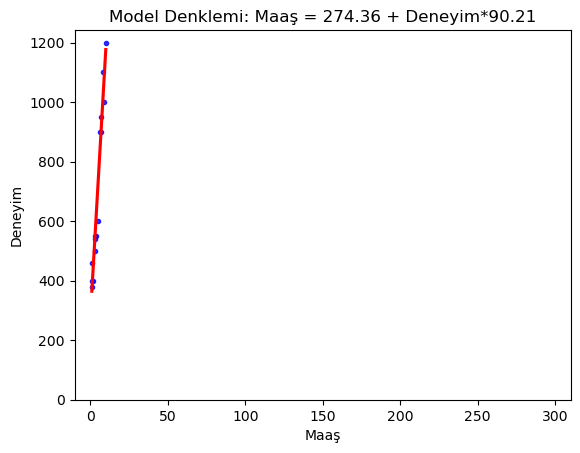

In [31]:
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(f"Model Denklemi: Maaş = {round(regression_model.intercept_[0], 2)} + Deneyim*{round(regression_model.coef_[0][0], 2)}")
g.set_ylabel("Deneyim")
g.set_xlabel("Maaş")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [ ]:
# sonuçlar çok kötü çıktı hepsi tutarsız büyük ihtimal mse rmse yüksek çıkacak 

In [ ]:
# Soru 3 
# Modelin başarısını ölçmek için MSE,RMSE,MAE skorlarını hesaplayınız

In [33]:
# MSE
y_pred = regression_model.predict(X)
mean_squared_error(y, y_pred)

4437.849912739966

In [37]:
# RMSE
np.sqrt(mean_squared_error(y, y_pred))

66.61718931882346

In [36]:
# MAE
mean_absolute_error(y, y_pred)

54.320418848167535

In [39]:
# R-KARE
regression_model.score(X, y)

0.9396360551357491